In [1]:
import gzip
import numpy as np
import requests
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#getting data from PDB web site
def get_data(url):
    r = urllib.request.urlopen(url).read()
    try: 
        r = gzip.decompress(r)
    except OSError:
        pass
    data = r.decode()
    return data

In [3]:
#extracting phi and psi:
def create_arrays(data):
    phis = np.array([])
    psis = np.array([])
    pos_phi = data.find('phi=')
    while pos_phi > 0 :
        pos_phi = pos_phi
        pos_psi = data.find('psi', pos_phi)
        phi = data[data.find('"', pos_phi) + 1: data.find('"', data.find('"', pos_phi) + 1)]
        psi = data[data.find('"', pos_psi) + 1: data.find('"', data.find('"', pos_psi) + 1)]
        #print(phi, psi)
        phis = np.append(phis, float(phi))
        psis = np.append(psis, float(psi))
        pos_phi = data.find('phi=', pos_phi+1)
    return phis, psis

In [4]:
#Plotting Ramachandran map
def plot_ramachandran(phis, psis, title):
    fig0 = plt.figure(figsize=(6, 6))
    fig = fig0.add_subplot()
    fig.axis([-180, 180, -180, 180])


    fig_x = fig.xaxis
    fig_y = fig.yaxis

    fig.xaxis.set_major_locator(ticker.MultipleLocator(180))
    fig.yaxis.set_major_locator(ticker.MultipleLocator(180))

    fig.grid(which='major',
            color = 'k')

    plt.title(title)  
    plt.xlabel('Phi')
    plt.ylabel('Psi')

    fig.plot(phis, psis, linestyle='None', marker='o',  
             markerfacecolor='red', markeredgecolor='black', markersize=4)


    plt.show()

**1) First compound is the structure of 1RYI glycine oxidase with bound inhibitor glycolate**

source: http://www.rcsb.org/structure/1RYI

In [5]:
data1 = get_data("http://files.rcsb.org/pub/pdb/validation_reports/ry/1ryi/1ryi_validation.xml.gz")
phi_arr1, psi_arr1 = create_arrays(data1)

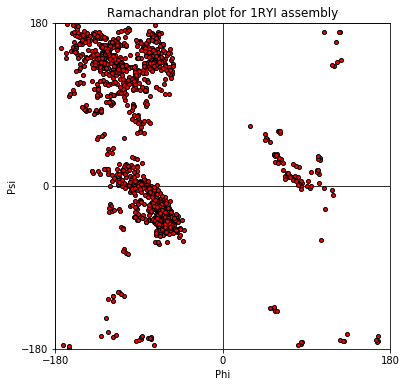

In [6]:
plot_ramachandran(phi_arr1, psi_arr1, 'Ramachandran plot for 1RYI assembly')

**2) Second compound is the structure of 3CJC actin dimer cross-linked by V. cholerae MARTX toxin and complexed with DNase1 and Gelsolin-segment 1 (simply speaking - Deoxyribonuclease 1)**

source page http://www.rcsb.org/structure/3CJC

In [7]:
data2 = get_data("http://files.rcsb.org/pub/pdb/validation_reports/cj/3cjc/3cjc_validation.xml.gz")
phi_arr2, psi_arr2 = create_arrays(data2)

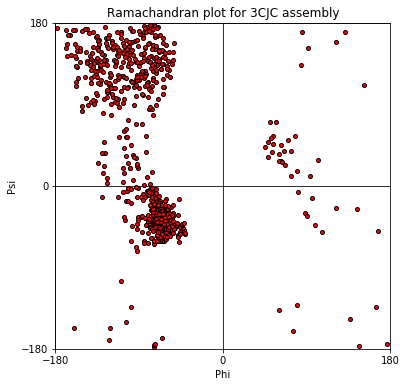

In [8]:
plot_ramachandran(phi_arr2, psi_arr2, 'Ramachandran plot for 3CJC assembly')

**3) Third compound is the 5CVC structure of maize serine racemase**

source page https://www.rcsb.org/structure/5CVC

In [9]:
data3 = get_data("https://files.rcsb.org/pub/pdb/validation_reports/cv/5cvc/5cvc_validation.xml.gz")
phi_arr3, psi_arr3 = create_arrays(data3)

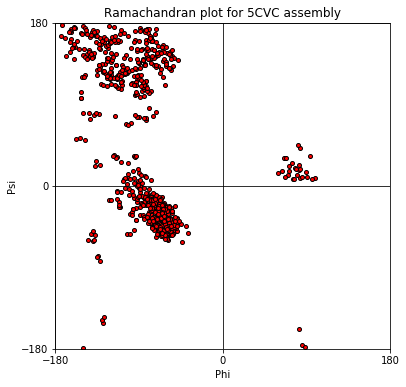

In [10]:
plot_ramachandran(phi_arr3, psi_arr3, 'Ramachandran plot for 5CVC assembly')